In [ ]:
# <h1 align="center">PREDICTING THE APPLICATION STORE, USERS USE OR BUY BASED ON THEIR DEMOGRAPHIC AND BEHAVIOURAL INFORMATION

<h3 align="center"> By: Shalini RV, Kiran Kumar Mumudala, Dhananjay prakash koli </h3>

# 1. Introduction

Today, technology has evolved a lot and we live in a mobile based world. A person uses his/her mobile for almost 8 hours per day or even more. People are always connected via messenger services, social media applications, etc. Millions of applications are created, downloaded and used for various purposes. This has given rise to a new set of developers who develop such applications and make it available on various platforms like Google Playstore, Apple store, etc. Mobile users visit these platforms and download applications as per their needs. For a single task, we have more than one application available. Example, for chatting we have Whatsapp, Wechat, Hike, etc. This is raised a stiff competition between application developers trying to better each other in their respective fields. There can be various factors which determine why a mobile user downloads a specific application over the other. Our project takes into consideration these factors and tries to extract information regarding the reasons for choosing a particular application store for downloading apps, and particular types of applications being downloaded based on various demographic information
______________________

# 2. Data Source and Collection : Data Cleansing
      

The Data Source for our project is the Kaggle Database. This dataset consists of mobile app user behavior, demographics, and Big-Five personality traits of 10,208 people worldwide. We would be split the data as training data set and test data set.
Predictive variable will be the Type of application stores user uses based on the existing demographic data. Our task next is to cleanse and summarize the data.
______________________

In [236]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import statsmodels.api as sm
from patsy import dmatrices
from sklearn import model_selection
from sklearn import naive_bayes
from sklearn import metrics
from sklearn import preprocessing
from sklearn import neighbors

In [237]:
#Importing the dataset
data = pd.read_csv("C:/Users/Shalini/Desktop/data methods python/mobile_app_user_dataset.csv")
data.head(10) # Fetching ten rows of the dataset

,Unique ID for each participant,StartDate,EndDate,"0=incomplete response, 1=complete response, 2=screened out (Q2 no mobile phone), 3=screened out (Q4 phone cannot run apps), 4=bad data, 5=screened out (complete but mentioned not using apps at some point during survey)","1=ours, 2=panel",Browser Meta Info-Browser,Browser Meta Info-Version,Browser Meta Info-Operating System,Browser Meta Info-Screen Resolution,Browser Meta Info-Flash Version,...,"Your personality may influence the types of apps you like. In this final section, we ask about your...-Extraverted, enthusiastic","Your personality may influence the types of apps you like. In this final section, we ask about your...-Critical, quarrelsome","Your personality may influence the types of apps you like. In this final section, we ask about your...-Dependable, self-disciplined","Your personality may influence the types of apps you like. In this final section, we ask about your...-Anxious, easily upset","Your personality may influence the types of apps you like. In this final section, we ask about your...-Open to new experiences, complex","Your personality may influence the types of apps you like. In this final section, we ask about your...-Reserved, quiet","Your personality may influence the types of apps you like. In this final section, we ask about your...-Sympathetic, warm","Your personality may influence the types of apps you like. In this final section, we ask about your...-Disorganized, careless","Your personality may influence the types of apps you like. In this final section, we ask about your...-Calm, emotionally stable","Your personality may influence the types of apps you like. In this final section, we ask about your...-Conventional, uncreative"
0,1,26-09-2012 07:46,26-09-2012 07:46,2,1,Chrome,21.0.1180.89,WOW64,1280x800,11.3.31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,26-09-2012 07:45,26-09-2012 07:56,1,1,Safari iPhone,6,CPU iPhone OS 6_0 like Mac OS X,320x480,-1,...,6.0,3.0,7.0,2.0,6.0,3.0,4.0,3.0,4.0,4.0
2,3,26-09-2012 07:45,26-09-2012 08:01,1,1,Safari,6,CPU OS 6_0 like Mac OS X,768x1024,-1,...,4.0,4.0,5.0,2.0,3.0,3.0,5.0,3.0,5.0,3.0
3,4,26-09-2012 16:58,26-09-2012 17:05,1,1,Firefox,15.0.1,Intel Mac OS X 10.6,1920x1200,11.4.402,...,4.0,3.0,6.0,3.0,5.0,5.0,5.0,2.0,5.0,3.0
4,5,27-09-2012 04:16,27-09-2012 04:24,1,1,Chrome,22.0.1229.79,Intel Mac OS X 10_7_4,1280x800,11.4.402,...,2.0,6.0,4.0,3.0,6.0,5.0,7.0,3.0,5.0,3.0
5,6,27-09-2012 08:50,27-09-2012 08:56,1,1,Chrome,21.0.1180.89,WOW64,1920x1080,11.3.31,...,3.0,2.0,6.0,2.0,6.0,4.0,3.0,2.0,5.0,2.0
6,7,28-09-2012 07:34,28-09-2012 07:52,1,1,Chrome,22.0.1229.79,Macintosh,1280x800,11.4.402,...,4.0,3.0,4.0,3.0,5.0,4.0,5.0,6.0,5.0,4.0
7,8,28-09-2012 10:07,28-09-2012 10:20,1,1,Firefox,15.0.1,Windows NT 6.1,1366x768,11.4.402,...,4.0,4.0,4.0,1.0,5.0,6.0,4.0,2.0,5.0,6.0
8,9,28-09-2012 11:32,28-09-2012 11:40,1,1,Firefox,15.0.1,Windows NT 6.1,1600x900,11.4.402,...,4.0,3.0,4.0,6.0,6.0,5.0,4.0,5.0,4.0,6.0
9,10,28-09-2012 12:22,28-09-2012 12:46,3,1,Chrome,22.0.1229.91,Windows NT 6.1,1366x768,11.3.31,...,5.0,5.0,4.0,5.0,5.0,5.0,4.0,5.0,4.0,4.0


In [238]:
list(data) # Fetching the columns names

['Unique ID for each participant',
 'StartDate',
 'EndDate',
 '0=incomplete response, 1=complete response, 2=screened out (Q2 no mobile phone), 3=screened out (Q4 phone cannot run apps), 4=bad data, 5=screened out (complete but mentioned not using apps at some point during survey)',
 '1=ours, 2=panel',
 'Browser Meta Info-Browser',
 'Browser Meta Info-Version',
 'Browser Meta Info-Operating System',
 'Browser Meta Info-Screen Resolution',
 'Browser Meta Info-Flash Version',
 'Browser Meta Info-Java Support',
 'Browser Meta Info-User Agent',
 'Do you own a mobile device? (e.g., phone or tablet)-1=Yes, 2=No',
 'What mobile device do you use?-Manufacturer name (e.g., Nokia)',
 'What mobile device do you use?-Model name and number (e.g., E71)',
 '0=Did not answer Q3, 1=Yes, 2=No',
 "Which app store do you use?-1=Apple iOS App Store, 2=Blackberry App World, 3=Google Play / Android Market, 4=Nokia Ovi Store, 5=Samsung Application Store, 6=Windows Phone Marketplace, 7=None - my mobile device 

In [239]:
df = data[['Do you own a mobile device? (e.g., phone or tablet)-1=Yes, 2=No','Which app store do you use?-1=Apple iOS App Store, 2=Blackberry App World, 3=Google Play / Android Market, 4=Nokia Ovi Store, 5=Samsung Application Store, 6=Windows Phone Marketplace, 7=None - my mobile device cannot run apps, 8=I don\'t know, 9=Other (please specify), 10=I don’t use apps',
      'What is your age?', 'This section asks about your demographic information (e.g., age, nationality, occupation). This is t...','What is your marital status?-1=In a relationship, 2=Single, 3=Married, 4=Divorced, 5=Widowed, 6=Separated, 7=Other (please specify)',
     'What is your nationality?-1=American, 2=Australian, 3=Brazillian, 4=British, 5=Canadian, 6=Chinese, 7=French, 8=German, 9=Indian, 10=Italian, 11=Japanese, 12=Mexican, 13=Russian, 14=South Korean, 15=Spanish, 16=Other (please specify)',
      'What is your country of residence?-1=Australia, 2=Brazil, 3=Canada, 4=China, 5=France, 6=Germany, 7=India, 8=Italy, 9=Japan, 10=Mexico, 11=Republic of Korea, 12=Russian Federation, 13=Spain, 14=United Kingdom, 15=United States, 16=Other (please specify)',
     'What is your first language?-1=English, 2=French, 3=German, 4=Italian, 5=Japanese, 6=Korean, 7=Mandarin, 8=Portuguese, 9=Russian, 10=Spanish, 11=Other (please specify)',
      'What is your ethnicity?-1=Asian (please specify, e.g., Chinese), 2=Black (please specify, e.g., African American), 3=Hispanic (please specify, e.g., Puerto Rican), 4=White (please specify, e.g., Scottish), 5=Mixed (please specify, e.g., English and German), 6=Other (please specify), 7=Prefer not to say',
      'What is the highest level of education you have completed?-1=Primary school, 2=Secondary / High school, 3=Diploma, 4=Vocational training, 5=Undergraduate degree, 6=Master’s degree, 7=Doctoral degree, 8=Other (please specify)',
     'Do you have a disability?-1=Yes (please specify), 2=No, 3=Prefer not to say','What is your current employment status?-1=Full-time, 2=Part-time, 3=Self-employed, 4=Student, 5=Homemaker, 6=Unemployed, 7=Unable to work, 8=Retired, 9=Other (please specify)',
     'Your personality may influence the types of apps you like. In this final section, we ask about your...-Extraverted, enthusiastic',
     'Your personality may influence the types of apps you like. In this final section, we ask about your...-Critical, quarrelsome',
      'Your personality may influence the types of apps you like. In this final section, we ask about your...-Dependable, self-disciplined',
      'Your personality may influence the types of apps you like. In this final section, we ask about your...-Anxious, easily upset',
      'Your personality may influence the types of apps you like. In this final section, we ask about your...-Open to new experiences, complex',
      'Your personality may influence the types of apps you like. In this final section, we ask about your...-Reserved, quiet',
      'Your personality may influence the types of apps you like. In this final section, we ask about your...-Sympathetic, warm',
      'Your personality may influence the types of apps you like. In this final section, we ask about your...-Disorganized, careless',
     'Your personality may influence the types of apps you like. In this final section, we ask about your...-Calm, emotionally stable',
     'Your personality may influence the types of apps you like. In this final section, we ask about your...-Conventional, uncreative']]

In [240]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,10198,10199,10200,10201,10202,10203,10204,10205,10206,10207
"Do you own a mobile device? (e.g., phone or tablet)-1=Yes, 2=No",2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0
"Which app store do you use?-1=Apple iOS App Store, 2=Blackberry App World, 3=Google Play / Android Market, 4=Nokia Ovi Store, 5=Samsung Application Store, 6=Windows Phone Marketplace, 7=None - my mobile device cannot run apps, 8=I don't know, 9=Other (please specify), 10=I don’t use apps",NaN,1.0,1.0,3.0,1.0,1.0,1.0,3.0,1.0,7.0,...,NaN,9.0,1.0,9.0,NaN,3.0,NaN,NaN,NaN,3.0
What is your age?,NaN,21.0,23.0,37.0,30.0,29.0,29.0,31.0,28.0,31.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0
"This section asks about your demographic information (e.g., age, nationality, occupation). This is t...",NaN,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
"What is your marital status?-1=In a relationship, 2=Single, 3=Married, 4=Divorced, 5=Widowed, 6=Separated, 7=Other (please specify)",NaN,2.0,2.0,3.0,2.0,1.0,3.0,3.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
"What is your nationality?-1=American, 2=Australian, 3=Brazillian, 4=British, 5=Canadian, 6=Chinese, 7=French, 8=German, 9=Indian, 10=Italian, 11=Japanese, 12=Mexican, 13=Russian, 14=South Korean, 15=Spanish, 16=Other (please specify)",NaN,1.0,16.0,10.0,12.0,4.0,16.0,2.0,11.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0
"What is your country of residence?-1=Australia, 2=Brazil, 3=Canada, 4=China, 5=France, 6=Germany, 7=India, 8=Italy, 9=Japan, 10=Mexico, 11=Republic of Korea, 12=Russian Federation, 13=Spain, 14=United Kingdom, 15=United States, 16=Other (please specify)",NaN,4.0,16.0,14.0,15.0,14.0,16.0,1.0,9.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
"What is your first language?-1=English, 2=French, 3=German, 4=Italian, 5=Japanese, 6=Korean, 7=Mandarin, 8=Portuguese, 9=Russian, 10=Spanish, 11=Other (please specify)",NaN,7.0,11.0,4.0,10.0,1.0,7.0,11.0,5.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
"What is your ethnicity?-1=Asian (please specify, e.g., Chinese), 2=Black (please specify, e.g., African American), 3=Hispanic (please specify, e.g., Puerto Rican), 4=White (please specify, e.g., Scottish), 5=Mixed (please specify, e.g., English and German), 6=Other (please specify), 7=Prefer not to say",NaN,1.0,1.0,4.0,3.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0
"What is the highest level of education you have completed?-1=Primary school, 2=Secondary / High school, 3=Diploma, 4=Vocational training, 5=Undergraduate degree, 6=Master’s degree, 7=Doctoral degree, 8=Other (please specify)",NaN,5.0,6.0,7.0,7.0,7.0,5.0,5.0,7.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0


In [241]:
df.describe().transpose() # Fetching the mean, standard deviation minimum, maximum and quartile values.

,count,mean,std,min,25%,50%,75%,max
"Do you own a mobile device? (e.g., phone or tablet)-1=Yes, 2=No",10200.0,1.118431,0.323134,1.0,1.0,1.0,1.0,2.0
"Which app store do you use?-1=Apple iOS App Store, 2=Blackberry App World, 3=Google Play / Android Market, 4=Nokia Ovi Store, 5=Samsung Application Store, 6=Windows Phone Marketplace, 7=None - my mobile device cannot run apps, 8=I don't know, 9=Other (please specify), 10=I don’t use apps",7898.0,4.496328,2.426543,1.0,3.0,4.0,7.0,10.0
What is your age?,5366.0,36.169139,16.395614,11.0,23.0,32.0,46.0,88.0
"This section asks about your demographic information (e.g., age, nationality, occupation). This is t...",5366.0,1.507082,0.499996,1.0,1.0,2.0,2.0,2.0
"What is your marital status?-1=In a relationship, 2=Single, 3=Married, 4=Divorced, 5=Widowed, 6=Separated, 7=Other (please specify)",5366.0,2.484905,0.982254,1.0,2.0,3.0,3.0,7.0
"What is your nationality?-1=American, 2=Australian, 3=Brazillian, 4=British, 5=Canadian, 6=Chinese, 7=French, 8=German, 9=Indian, 10=Italian, 11=Japanese, 12=Mexican, 13=Russian, 14=South Korean, 15=Spanish, 16=Other (please specify)",5366.0,8.050317,4.449791,1.0,5.0,8.0,12.0,16.0
"What is your country of residence?-1=Australia, 2=Brazil, 3=Canada, 4=China, 5=France, 6=Germany, 7=India, 8=Italy, 9=Japan, 10=Mexico, 11=Republic of Korea, 12=Russian Federation, 13=Spain, 14=United Kingdom, 15=United States, 16=Other (please specify)",5366.0,7.662877,4.588594,1.0,4.0,7.0,12.0,16.0
"What is your first language?-1=English, 2=French, 3=German, 4=Italian, 5=Japanese, 6=Korean, 7=Mandarin, 8=Portuguese, 9=Russian, 10=Spanish, 11=Other (please specify)",5366.0,5.304324,3.582500,1.0,1.0,5.0,8.0,11.0
"What is your ethnicity?-1=Asian (please specify, e.g., Chinese), 2=Black (please specify, e.g., African American), 3=Hispanic (please specify, e.g., Puerto Rican), 4=White (please specify, e.g., Scottish), 5=Mixed (please specify, e.g., English and German), 6=Other (please specify), 7=Prefer not to say",5366.0,3.458256,1.951134,1.0,1.0,4.0,4.0,7.0
"What is the highest level of education you have completed?-1=Primary school, 2=Secondary / High school, 3=Diploma, 4=Vocational training, 5=Undergraduate degree, 6=Master’s degree, 7=Doctoral degree, 8=Other (please specify)",5316.0,3.797216,1.565106,1.0,2.0,4.0,5.0,8.0


In [242]:
df.rename(columns={'Do you own a mobile device? (e.g., phone or tablet)-1=Yes, 2=No':'Mobiledevice','Which app store do you use?-1=Apple iOS App Store, 2=Blackberry App World, 3=Google Play / Android Market, 4=Nokia Ovi Store, 5=Samsung Application Store, 6=Windows Phone Marketplace, 7=None - my mobile device cannot run apps, 8=I don\'t know, 9=Other (please specify), 10=I don’t use apps':'Appstore',
      'What is your age?':'Age', 'This section asks about your demographic information (e.g., age, nationality, occupation). This is t...':'gender','What is your marital status?-1=In a relationship, 2=Single, 3=Married, 4=Divorced, 5=Widowed, 6=Separated, 7=Other (please specify)':'Maritalstatus',
     'What is your nationality?-1=American, 2=Australian, 3=Brazillian, 4=British, 5=Canadian, 6=Chinese, 7=French, 8=German, 9=Indian, 10=Italian, 11=Japanese, 12=Mexican, 13=Russian, 14=South Korean, 15=Spanish, 16=Other (please specify)':'Nationality',
      'What is your country of residence?-1=Australia, 2=Brazil, 3=Canada, 4=China, 5=France, 6=Germany, 7=India, 8=Italy, 9=Japan, 10=Mexico, 11=Republic of Korea, 12=Russian Federation, 13=Spain, 14=United Kingdom, 15=United States, 16=Other (please specify)': 'CountryofResidence',
     'What is your first language?-1=English, 2=French, 3=German, 4=Italian, 5=Japanese, 6=Korean, 7=Mandarin, 8=Portuguese, 9=Russian, 10=Spanish, 11=Other (please specify)': 'LanguageSpoken',
      'What is your ethnicity?-1=Asian (please specify, e.g., Chinese), 2=Black (please specify, e.g., African American), 3=Hispanic (please specify, e.g., Puerto Rican), 4=White (please specify, e.g., Scottish), 5=Mixed (please specify, e.g., English and German), 6=Other (please specify), 7=Prefer not to say': 'Ethnicity',
      'What is the highest level of education you have completed?-1=Primary school, 2=Secondary / High school, 3=Diploma, 4=Vocational training, 5=Undergraduate degree, 6=Master’s degree, 7=Doctoral degree, 8=Other (please specify)':'Education',
     'Do you have a disability?-1=Yes (please specify), 2=No, 3=Prefer not to say':'Disability','What is your current employment status?-1=Full-time, 2=Part-time, 3=Self-employed, 4=Student, 5=Homemaker, 6=Unemployed, 7=Unable to work, 8=Retired, 9=Other (please specify)':'EmploymentStatus',
     'Your personality may influence the types of apps you like. In this final section, we ask about your...-Extraverted, enthusiastic':'Personality1',
     'Your personality may influence the types of apps you like. In this final section, we ask about your...-Critical, quarrelsome':'Personality2',
      'Your personality may influence the types of apps you like. In this final section, we ask about your...-Dependable, self-disciplined':'Personality3',
      'Your personality may influence the types of apps you like. In this final section, we ask about your...-Anxious, easily upset':'Personality4',
      'Your personality may influence the types of apps you like. In this final section, we ask about your...-Open to new experiences, complex':'Personality5',
      'Your personality may influence the types of apps you like. In this final section, we ask about your...-Reserved, quiet':'Personality6',
      'Your personality may influence the types of apps you like. In this final section, we ask about your...-Sympathetic, warm':'Personality7',
      'Your personality may influence the types of apps you like. In this final section, we ask about your...-Disorganized, careless':'Personality8',
     'Your personality may influence the types of apps you like. In this final section, we ask about your...-Calm, emotionally stable':'Personality9',
     'Your personality may influence the types of apps you like. In this final section, we ask about your...-Conventional, uncreative':'Personality10'}, inplace=True)
df.head(10) # Renaming the column names for easy comprehension of coulmn names.

c:\users\shalini\envs\ist5520\lib\site-packages\pandas\core\frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,Mobiledevice,Appstore,Age,gender,Maritalstatus,Nationality,CountryofResidence,LanguageSpoken,Ethnicity,Education,...,Personality1,Personality2,Personality3,Personality4,Personality5,Personality6,Personality7,Personality8,Personality9,Personality10
0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,21.0,1.0,2.0,1.0,4.0,7.0,1.0,5.0,...,6.0,3.0,7.0,2.0,6.0,3.0,4.0,3.0,4.0,4.0
2,1.0,1.0,23.0,1.0,2.0,16.0,16.0,11.0,1.0,6.0,...,4.0,4.0,5.0,2.0,3.0,3.0,5.0,3.0,5.0,3.0
3,1.0,3.0,37.0,1.0,3.0,10.0,14.0,4.0,4.0,7.0,...,4.0,3.0,6.0,3.0,5.0,5.0,5.0,2.0,5.0,3.0
4,1.0,1.0,30.0,1.0,2.0,12.0,15.0,10.0,3.0,7.0,...,2.0,6.0,4.0,3.0,6.0,5.0,7.0,3.0,5.0,3.0
5,1.0,1.0,29.0,2.0,1.0,4.0,14.0,1.0,1.0,7.0,...,3.0,2.0,6.0,2.0,6.0,4.0,3.0,2.0,5.0,2.0
6,1.0,1.0,29.0,1.0,3.0,16.0,16.0,7.0,1.0,5.0,...,4.0,3.0,4.0,3.0,5.0,4.0,5.0,6.0,5.0,4.0
7,1.0,3.0,31.0,1.0,3.0,2.0,1.0,11.0,1.0,5.0,...,4.0,4.0,4.0,1.0,5.0,6.0,4.0,2.0,5.0,6.0
8,1.0,1.0,28.0,1.0,2.0,11.0,9.0,5.0,1.0,7.0,...,4.0,3.0,4.0,6.0,6.0,5.0,4.0,5.0,4.0,6.0
9,1.0,7.0,31.0,2.0,1.0,11.0,9.0,5.0,1.0,7.0,...,5.0,5.0,4.0,5.0,5.0,5.0,4.0,5.0,4.0,4.0


Summarizing the meaning of each variable based on our understanding:

- **Mobile Device** (1= Yes, 2= No)
- **App store** (1=Apple iOS App Store, 2=Blackberry App World, 3=Google Play / Android Market, 4=Nokia Ovi Store, 5=Samsung Application Store, 6=Windows Phone Marketplace, 7=None - my mobile device cannot run apps, 8=I don\'t know, 9=Other (please specify), 10=I don’t use apps)
- **Age** (14 - 80)
- **Gender** (1= Male, 2= Female)
- **Marital status** (1=In a relationship, 2=Single, 3=Married, 4=Divorced, 5=Widowed, 6=Separated, 7=Other (please specify)
- **Nationality** (1=American, 2=Australian, 3=Brazillian, 4=British, 5=Canadian, 6=Chinese, 7=French, 8=German, 9=Indian, 10=Italian, 11=Japanese, 12=Mexican, 13=Russian, 14=South Korean, 15=Spanish, 16=Other (please specify))
- **Country of Residence** (1=Australia, 2=Brazil, 3=Canada, 4=China, 5=France, 6=Germany, 7=India, 8=Italy, 9=Japan, 10=Mexico, 11=Republic of Korea, 12=Russian Federation, 13=Spain, 14=United Kingdom, 15=United States, 16=Other (please specify))
- **Language Spoken** (1=English, 2=French, 3=German, 4=Italian, 5=Japanese, 6=Korean, 7=Mandarin, 8=Portuguese, 9=Russian, 10=Spanish, 11=Other (please specify))
- **Ethnicity** (1=Asian (please specify, e.g., Chinese), 2=Black (please specify, e.g., African American), 3=Hispanic (please specify, e.g., Puerto Rican), 4=White (please specify, e.g., Scottish), 5=Mixed (please specify, e.g., English and German), 6=Other (please specify), 7=Prefer not to say)
- **Education** (1=Primary school, 2=Secondary / High school, 3=Diploma, 4=Vocational training, 5=Undergraduate degree, 6=Master’s degree, 7=Doctoral degree, 8=Other (please specify)
- **Disability** (1=Yes (please specify), 2=No, 3=Prefer not to say)
- **Employment** Status (1=Full-time, 2=Part-time, 3=Self-employed, 4=Student, 5=Homemaker, 6=Unemployed, 7=Unable to work, 8=Retired, 9=Other (please specify))
- **Personality1** (1-Extraverted, enthusiastic)
- **Personality2** (2-Critical, quarrelsome)
- **Personality3** (3-Dependable, self-disciplined )
- **Personality4** (4-Anxious, easily upset)
-  **Personality5** (5-Open to new experiences, complex)
- **Personality6** (6-Reserved, quiet)
- **Personality7** (7-Sympathetic, warm)
- **Personality8** (8-Disorganized, careless)
- **Personality9** (9-Calm, emotionally stable)
- **Personality10** (10-Conventional, uncreative)

In [243]:
df.dtypes

Mobiledevice          float64
Appstore              float64
Age                   float64
gender                float64
Maritalstatus         float64
Nationality           float64
CountryofResidence    float64
LanguageSpoken        float64
Ethnicity             float64
Education             float64
Disability            float64
EmploymentStatus      float64
Personality1          float64
Personality2          float64
Personality3          float64
Personality4          float64
Personality5          float64
Personality6          float64
Personality7          float64
Personality8          float64
Personality9          float64
Personality10         float64
dtype: object

In [ ]:
#  PLOTTING GRAPHS

In [244]:
df_Appstore = df.groupby('Appstore')

df_Appstore.size()


Appstore
1.0     1169
2.0      333
3.0     2066
4.0      830
5.0      722
6.0      162
7.0     1653
8.0      737
9.0      150
10.0      76
dtype: int64

([<matplotlib.axis.XTick at 0x1505b5ff1d0>,
 <a list of 10 Text xticklabel objects>)

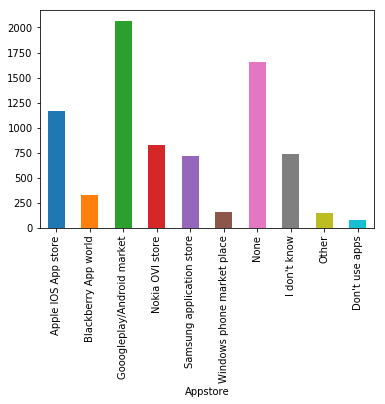

In [245]:
df_Appstore.size().plot(kind='bar',legend=False)
plt.xticks([0,1,2,3,4,5,6,7,8,9],['Apple IOS App store','Blackberry App world','Gooogleplay/Android market','Nokia OVI store',
        'Samsung application store','Windows phone market place','None','I don\'t know','Other','Don\'t use apps'])
#df_Appstore.size().plot(kind = 'bar', title = 'App store used'))


We can see that maximum number of users are 3-Google play store, 1-Apple App store, 4- Nokia App store

In [246]:
df_gender = df.groupby('gender')

df_gender.size()


gender
1.0    2645
2.0    2721
dtype: int64

([<matplotlib.axis.XTick at 0x1505602e828>,
 <a list of 10 Text xticklabel objects>)

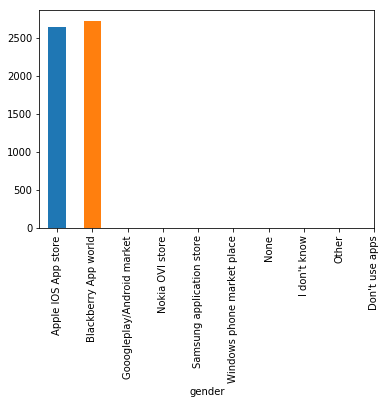

In [247]:
df_gender.size().plot(kind='bar',legend=False)
plt.xticks([0,1,2,3,4,5,6,7,8,9],['Apple IOS App store','Blackberry App world','Gooogleplay/Android market','Nokia OVI store',
        'Samsung application store','Windows phone market place','None','I don\'t know','Other','Don\'t use apps'])
#df_Appstore.size().plot(kind = 'bar', title = 'App store used'))


In [248]:
df_marital_status = df.groupby('Maritalstatus')

df_marital_status.size()


Maritalstatus
1.0     802
2.0    1843
3.0    2331
4.0     218
5.0      70
6.0      83
7.0      19
dtype: int64

([<matplotlib.axis.XTick at 0x15055e4c2b0>,
 <a list of 7 Text xticklabel objects>)

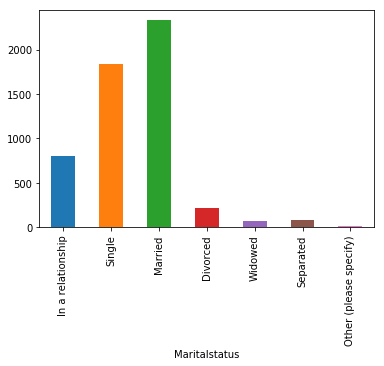

In [249]:
df_marital_status.size().plot(kind='bar',legend=False)
plt.xticks([0,1,2,3,4,5,6],['In a relationship', 'Single', 'Married', 'Divorced', 'Widowed', 'Separated', 'Other (please specify)'])
#df_Appstore.size().plot(kind = 'bar', title = 'App store used'))


In [250]:
df_language_spoken = df.groupby('LanguageSpoken')

df_language_spoken .size()


LanguageSpoken
1.0     1480
2.0      355
3.0      277
4.0      280
5.0      356
6.0      271
7.0      569
8.0      456
9.0      337
10.0     583
11.0     402
dtype: int64

([<matplotlib.axis.XTick at 0x15055f6ad30>,
 <a list of 11 Text xticklabel objects>)

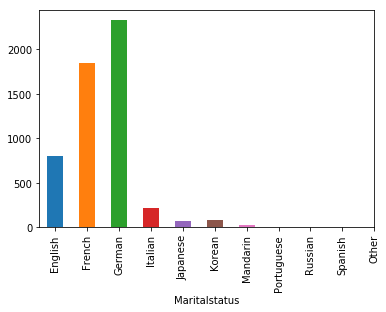

In [251]:
df_marital_status.size().plot(kind='bar',legend=False)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10],[ 'English','French','German', 'Italian', 'Japanese','Korean','Mandarin','Portuguese', 'Russian', 'Spanish', 'Other'])
#df_Appstore.size().plot(kind = 'bar', title = 'App store used'))


In [252]:
df_Personality1 = df.groupby('Personality1')

df_Personality1.size()


Personality1
1.0     194
2.0     428
3.0     639
4.0    1239
5.0    1174
6.0     982
7.0     620
dtype: int64

([<matplotlib.axis.XTick at 0x1505e3f0dd8>,
 <a list of 16 Text xticklabel objects>)

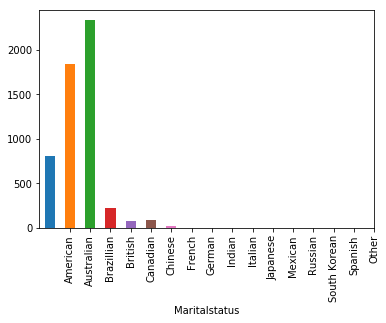

In [253]:
df_marital_status.size().plot(kind='bar',legend=False)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16],['American', 'Australian','Brazillian','British','Canadian', 'Chinese','French','German','Indian','Italian','Japanese','Mexican','Russian','South Korean','Spanish','Other'])
#df_Appstore.size().plot(kind = 'bar', title = 'App store used'))


In [254]:
dat=df.loc[df['Appstore'].isin([1,2,3,4,5,6])]

### Replacing Customers using samsung, blackberry, windows phone market app store i.e: 2, 5 ,6 categories to 0

In [255]:
dat['Appstore'].replace(2, 0, inplace=True)
dat['Appstore'].replace(5, 0, inplace=True)
dat['Appstore'].replace(6, 0, inplace=True)
dat['Appstore'].value_counts()



c:\users\shalini\envs\ist5520\lib\site-packages\pandas\core\generic.py:4619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


3.0    2066
0.0    1217
1.0    1169
4.0     830
Name: Appstore, dtype: int64

# Customers using googleplay, apple, nokia app store i.e: 3, 1 ,4 categories

### Replacing Customers using google, apple, nokia app store i.e: 2, 5 ,6 categories to 1

In [256]:
dat['Appstore'].replace(3, 1, inplace=True)
dat['Appstore'].replace(4, 1, inplace=True)
dat['Appstore'].value_counts()

c:\users\shalini\envs\ist5520\lib\site-packages\pandas\core\generic.py:4619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


1.0    4065
0.0    1217
Name: Appstore, dtype: int64

# Using finite values

In [257]:
dat = dat[np.isfinite(dat['Mobiledevice'])]
dat = dat[np.isfinite(dat['Appstore'])]
dat = dat[np.isfinite(dat['Age'])]
dat = dat[np.isfinite(dat['gender'])]
dat = dat[np.isfinite(dat['Maritalstatus'])]
dat = dat[np.isfinite(dat['Nationality'])]
dat = dat[np.isfinite(dat['CountryofResidence'])]
dat = dat[np.isfinite(dat['LanguageSpoken'])]
dat = dat[np.isfinite(dat['Ethnicity'])]
dat = dat[np.isfinite(dat['Education'])]
dat = dat[np.isfinite(dat['Disability'])]
dat = dat[np.isfinite(dat['EmploymentStatus'])]
dat = dat[np.isfinite(dat['Personality1'])]
dat = dat[np.isfinite(dat['Personality2'])]
dat = dat[np.isfinite(dat['Personality3'])]
dat = dat[np.isfinite(dat['Personality4'])]
dat = dat[np.isfinite(dat['Personality5'])]
dat = dat[np.isfinite(dat['Personality6'])]
dat = dat[np.isfinite(dat['Personality7'])]
dat = dat[np.isfinite(dat['Personality8'])]
dat = dat[np.isfinite(dat['Personality9'])]
dat = dat[np.isfinite(dat['Personality10'])]


In [258]:
dat.Education = dat.Education.astype('str')
dat.Maritalstatus = dat.Maritalstatus.astype('str')
dat.Nationality = dat.Nationality.astype('str')
dat.CountryofResidence = dat.CountryofResidence.astype('str')
dat.LanguageSpoken = dat.LanguageSpoken.astype('str')
dat.Ethnicity = dat.Ethnicity.astype('str')
dat.EmploymentStatus = dat.EmploymentStatus.astype('str')
dat.Disability = dat.Disability.astype('str')
dat.Personality1 = dat.Personality1.astype('str')
dat.Personality2 = dat.Personality2.astype('str')
dat.Personality3 = dat.Personality3.astype('str')
dat.Personality4 = dat.Personality4.astype('str')
dat.Personality5 = dat.Personality5.astype('str')
dat.Personality6 = dat.Personality6.astype('str')
dat.Personality7 = dat.Personality7.astype('str')
dat.Personality8 = dat.Personality8.astype('str')
dat.Personality9 = dat.Personality9.astype('str')
dat.Personality10 = dat.Personality10.astype('str')
dat.gender = dat.gender.astype('str')


# Regression Analysis

In [259]:
y, X = dmatrices('Appstore ~ Mobiledevice + Maritalstatus +' + 
                 'Nationality + CountryofResidence + LanguageSpoken + Ethnicity + Education +' +
                 'EmploymentStatus + Disability + Age +' +
                 'Personality1 + Personality2 + Personality3 + Personality4 +'+
                 'Personality5 + Personality6 + Personality7 + Personality8 + gender + Personality9 + Personality10',
                 data=dat,
                 return_type='dataframe')

In [260]:
X.head(10)

,Intercept,Maritalstatus[T.2.0],Maritalstatus[T.3.0],Maritalstatus[T.4.0],Maritalstatus[T.5.0],Maritalstatus[T.6.0],Maritalstatus[T.7.0],Nationality[T.10.0],Nationality[T.11.0],Nationality[T.12.0],...,Personality9[T.6.0],Personality9[T.7.0],Personality10[T.2.0],Personality10[T.3.0],Personality10[T.4.0],Personality10[T.5.0],Personality10[T.6.0],Personality10[T.7.0],Mobiledevice,Age
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,21.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,23.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,37.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,30.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,29.0
6,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,29.0
7,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,31.0
8,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,28.0
10,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,31.0
15,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,25.0


In [261]:
y=dat['Appstore']

In [262]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
# Describe the linear model
mod = sm.OLS(y,X)

# Fit model
fit = mod.fit()

# Summarize model
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Appstore   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     1.725
Date:                Sun, 29 Apr 2018   Prob (F-statistic):           8.35e-07
Time:                        23:54:10   Log-Likelihood:                -2484.0
No. Observations:                4720   AIC:                             5232.
Df Residuals:                    4588   BIC:                             6085.
Df Model:                         131                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.5227      0.066      7.876      0.000       0.393       0.653
Maritalstatus[T.2.0]          -0.0075      0.020     -0.377      0.706      -0.046       0.031
Maritalstatus[T.3.0]          -0.0242      0.020     -1.219      0.223      -0.063       0.015
Maritalstatus[T.4.0]           0.0748      0.037      2.025      0.043       0.002       0.147
Maritalstatus[T.5.0]          -0.0487      0.064     -0.765      0.444      -0.174       0.076
Maritalstatus[T.6.0]          -0.0183      0.052     -0.353      0.724      -0.120       0.083
Maritalstatus[T.7.0]          -0.0500      0.118     -0.422      0.673      -0.282       0.182
Nationality[T.10.0]           -0.0387      0.097     -0.399      0.690      -0.229       0.151
Nationality[T.11.0]            0.1169      0.207      0.564      0.572      -0.289       0.523
Nationality[T.12.0]           -0.0553      0.089     -0.622      0.534      -0.230       0.119
Nationality[T.13.0]           -0.0322      0.113     -0.286      0.775      -0.253       0.189
Nationality[T.14.0]            0.2133      0.300      0.712      0.476      -0.374       0.801
Nationality[T.15.0]            0.0379      0.082      0.462      0.644      -0.123       0.199
Nationality[T.16.0]           -0.0294      0.060     -0.491      0.623      -0.147       0.088
Nationality[T.2.0]             0.0229      0.083      0.275      0.784      -0.141       0.186
Nationality[T.3.0]            -0.0430      0.171     -0.251      0.802      -0.379       0.293
Nationality[T.4.0]            -0.0849      0.080     -1.055      0.291      -0.243       0.073
Nationality[T.5.0]            -0.0563      0.069     -0.818      0.414      -0.191       0.079
Nationality[T.6.0]            -0.0664      0.080     -0.826      0.409      -0.224       0.091
Nationality[T.7.0]            -0.1311      0.120     -1.093      0.274      -0.366       0.104
Nationality[T.8.0]            -0.1851      0.105     -1.759      0.079      -0.391       0.021
Nationality[T.9.0]            -0.0226      0.099     -0.228      0.820      -0.217       0.172
CountryofResidence[T.10.0]     0.0600      0.110      0.548      0.584      -0.155       0.275
CountryofResidence[T.11.0]     0.1972      0.186      1.058      0.290      -0.168       0.562
CountryofResidence[T.12.0]    -0.0562      0.102     -0.551      0.582      -0.256       0.144
CountryofResidence[T.13.0]    -0.0111      0.096     -0.115      0.908      -0.199       0.177
CountryofResidence[T.14.0]     0.0004      0.083      0.004      0.997      -0.162       0.163
CountryofResidence[T.15.0]     0.0258      0.080      0.323      0.747      -0.131       0.183
CountryofResidence[T.16.0]    -0.0027      0.076     -0.036      0.971      -0.151       0.146
CountryofResidence[T.2.0]     -0.0032      

In [263]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
# Describe the linear model
mod = sm.Logit(y,X)

# Fit model
fit = mod.fit()

# Summarize model
fit.summary()

         Current function value: 0.511981
         Iterations: 35


c:\users\shalini\envs\ist5520\lib\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\users\shalini\envs\ist5520\lib\statsmodels\base\model.py:1029: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(self.cov_params()))
c:\users\shalini\envs\ist5520\lib\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
c:\users\shalini\envs\ist5520\lib\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
c:\users\shalini\envs\ist5520\lib\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Appstore   No. Observations:                 4720
Model:                          Logit   Df Residuals:                     4588
Method:                           MLE   Df Model:                          131
Date:                Sun, 29 Apr 2018   Pseudo R-squ.:                 0.04625
Time:                        23:54:11   Log-Likelihood:                -2416.5
converged:                      False   LL-Null:                       -2533.7
                                        LLR p-value:                 7.574e-08
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      1.6604        nan        nan        nan         nan         nan
Maritalstatus[T.2.0]          -0.0417      0.118     -0.355      0.723      -0.272       0.189
Maritalstatus[T.3.0]          -0.1379      0.112     -1.230      0.219      -0.358       0.082
Maritalstatus[T.4.0]           0.4614      0.231      1.996      0.046       0.008       0.914
Maritalstatus[T.5.0]          -0.2768      0.356     -0.777      0.437      -0.975       0.422
Maritalstatus[T.6.0]          -0.0875      0.289     -0.303      0.762      -0.654       0.479
Maritalstatus[T.7.0]          -0.2328      0.640     -0.364      0.716      -1.487       1.022
Nationality[T.10.0]           -0.2931      0.573     -0.512      0.609      -1.415       0.829
Nationality[T.11.0]            0.5595      1.332      0.420      0.675      -2.052       3.171
Nationality[T.12.0]           -0.4160      0.547     -0.760      0.447      -1.488       0.657
Nationality[T.13.0]           -0.1859      0.706     -0.263      0.792      -1.569       1.197
Nationality[T.14.0]           26.1000   7.32e+05   3.57e-05      1.000   -1.43e+06    1.43e+06
Nationality[T.15.0]            0.2385      0.509      0.469      0.639      -0.759       1.236
Nationality[T.16.0]           -0.1656      0.366     -0.452      0.651      -0.883       0.552
Nationality[T.2.0]             0.1538      0.524      0.294      0.769      -0.873       1.180
Nationality[T.3.0]            -0.2217      0.986     -0.225      0.822      -2.153       1.710
Nationality[T.4.0]            -0.6085      0.499     -1.219      0.223      -1.587       0.370
Nationality[T.5.0]            -0.3956      0.427     -0.927      0.354      -1.232       0.440
Nationality[T.6.0]            -0.5290      0.499     -1.059      0.289      -1.508       0.450
Nationality[T.7.0]            -0.9127      0.687     -1.329      0.184      -2.259       0.434
Nationality[T.8.0]            -1.2393      0.691     -1.794      0.073      -2.593       0.115
Nationality[T.9.0]            -0.2011      0.388     -0.518      0.605      -0.962       0.560
CountryofResidence[T.10.0]     0.4756      0.711      0.669      0.504      -0.918       1.869
CountryofResidence[T.11.0]     1.0918      1.141      0.957      0.339      -1.145       3.329
CountryofResidence[T.12.0]    -0.3223      0.621     -0.519      0.604      -1.540       0.896
CountryofResidence[T.13.0]    -0.0334      0.621     -0.054      0.957      -1.251       1.184
CountryofResidence[T.14.0]    -0.0139      0.574     -0.024      0.981      -1.140       1.112
CountryofResidence[T.15.0]     0.1508      0.502      0.300      0.764      -0.834       1.135
CountryofResidence[T.16.0]     0.0130      0.511      0.025      0.980      -0.988       1.014
CountryofResidence[T.2.0]      0.0411      1.046      0.039      0.969      -2.009       2.091
CountryofResidence[T.3.0]     -0.5672      0.527     -1.076      0.282      -1.601       0.466
CountryofRe

In [264]:
X_new=dat[['gender', 'Personality4', 'Personality9', 'LanguageSpoken',
        'Maritalstatus']]

Considering variables which have very less p values

In [265]:
# 20-80% simple split
# To make the result reproducible, set the random_state
y_train,y_test,X_train,X_test= model_selection.train_test_split(y, X_new,
                                                                 test_size=0.2,
                                                                 random_state=123)

## K-Nearest Neighbors (kNN)

### Train a k-NN Classifier

In [266]:
from sklearn import neighbors
import numpy as np

In [267]:
# Candidate values of k
k = np.arange(50) + 1

k

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [268]:
para_knn = {'n_neighbors':k}
para_knn

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])}

In [269]:
knn = neighbors.KNeighborsClassifier()

In [270]:
grid_knn = model_selection.GridSearchCV(knn, para_knn)

In [271]:
grid_knn.fit(X_train,y_train.values.ravel())

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [272]:
# Show best parameters
grid_knn.best_params_

{'n_neighbors': 46}

In [273]:
# KNN: K=5, default measure of distance (euclidean)
knn1 = neighbors.KNeighborsClassifier(n_neighbors=17, 
                                      weights='uniform', 
                                      algorithm='auto')# auto euclidian theorem!

In [274]:
knn1.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=17, p=2,
           weights='uniform')

### Evaluate k-NN Classifier

In [275]:
pred_y = knn1.predict(X_test)

In [276]:
# Print confusion matrix
print(metrics.confusion_matrix(y_test, pred_y))

[[  4 211]
 [  9 720]]


In [277]:
# Calculate classification accuracy
metrics.accuracy_score(y_test, pred_y)

0.7669491525423728

In [278]:
# Calculate AUC
metrics.roc_auc_score(y_test, pred_y)# good classifier AUC>0.8

0.5031294860752225

In [279]:
# Calculate Cohen's Kappa
metrics.cohen_kappa_score(y_test, pred_y)

0.009358811688497504

In [280]:
# Print classification report
print(metrics.classification_report(y_test, pred_y))

             precision    recall  f1-score   support

        0.0       0.31      0.02      0.04       215
        1.0       0.77      0.99      0.87       729

avg / total       0.67      0.77      0.68       944



# Classification Tree

### Train a Classification Tree

In [281]:
from sklearn import tree

In [282]:
np.arange(51)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [283]:
para_dt = {'min_samples_split':np.arange(2,51)}
para_dt

{'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])}

In [284]:
dt = tree.DecisionTreeClassifier(criterion='entropy')

In [285]:
grid_dt = model_selection.GridSearchCV(dt, para_dt)

In [286]:
grid_dt.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [287]:
# Show best parameters
grid_dt.best_params_


{'min_samples_split': 49}

### Evaluate Classification Tree

In [288]:
# Predict on test set
pred_y_dsnt = grid_dt.predict(X_test)

In [289]:
# Print confusion matrix
print(metrics.confusion_matrix(y_test, pred_y_dsnt))

[[  8 207]
 [ 31 698]]


In [290]:
# Calculate classification accuracy
metrics.accuracy_score(y_test, pred_y_dsnt)

0.7478813559322034

In [291]:
# Calculate AUC
metrics.roc_auc_score(y_test, pred_y_dsnt)

0.4973426484193065

In [292]:
# Calculate Cohen's Kappa
metrics.cohen_kappa_score(y_test, pred_y_dsnt)

-0.007470651013874008

In [293]:
# Print classification report
print(metrics.classification_report(y_test, pred_y_dsnt))

             precision    recall  f1-score   support

        0.0       0.21      0.04      0.06       215
        1.0       0.77      0.96      0.85       729

avg / total       0.64      0.75      0.67       944



# Random Forests

### Train a Random Forests

In [294]:
from sklearn import ensemble

In [295]:
para = {'criterion': ['entropy'],
              'n_estimators':[10,20,30,40,50,60,70,80,90,100,150],
              'random_state':[123]}
para

{'criterion': ['entropy'],
 'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150],
 'random_state': [123]}

In [296]:
rf = ensemble.RandomForestClassifier()

In [297]:
grid_rf = model_selection.GridSearchCV(rf, para)

In [298]:
grid_rf.fit(X_train,y_train.values.ravel())

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ['entropy'], 'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150], 'random_state': [123]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [299]:
# Show best parameters
grid_rf.best_params_


{'criterion': 'entropy', 'n_estimators': 100, 'random_state': 123}

### Evaluate the Random Forests

In [300]:
pred_y_rf = grid_rf.predict(X_test)

In [301]:
# Print confusion matrix
print(metrics.confusion_matrix(y_test, pred_y_rf))

[[ 25 190]
 [ 80 649]]


In [302]:
# Calculate classification accuracy
metrics.accuracy_score(y_test, pred_y_rf)

0.7139830508474576

In [303]:
# Calculate AUC
metrics.roc_auc_score(y_test, pred_y_rf)

0.5032698503844069

In [304]:
# Calculate Cohen's Kappa
metrics.cohen_kappa_score(y_test, pred_y_rf)

0.007978826917837578

In [305]:
# Print classification report
print(metrics.classification_report(y_test, pred_y_rf))

             precision    recall  f1-score   support

        0.0       0.24      0.12      0.16       215
        1.0       0.77      0.89      0.83       729

avg / total       0.65      0.71      0.67       944



# Artificial Neural Network (MLP)

### Train an MLP

In [306]:
from sklearn import neural_network

In [307]:
para_ann = {'hidden_layer_sizes':[(250),
                                  (200),
                                  (150,),
                                  (100,),
                                  (50,),
                                  (50,10),
                                  (9,7,5,3)]}
para_ann

{'hidden_layer_sizes': [250,
  200,
  (150,),
  (100,),
  (50,),
  (50, 10),
  (9, 7, 5, 3)]}

In [308]:
ann = neural_network.MLPClassifier(max_iter=300)

In [309]:
grid_ann = model_selection.GridSearchCV(ann, para_ann)

In [310]:
grid_ann.fit(X_train,y_train.values.ravel())

GridSearchCV(cv=None, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=300, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'hidden_layer_sizes': [250, 200, (150,), (100,), (50,), (50, 10), (9, 7, 5, 3)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [311]:
# Show best parameters
grid_ann.best_params_


{'hidden_layer_sizes': 250}

### Evaluate the MLP

In [312]:
# Predict on test set
pred_y_ann = grid_ann.predict(X_test)

In [313]:
# Print confusion matrix
print(metrics.confusion_matrix(y_test, pred_y_ann))

[[  0 215]
 [  0 729]]


In [314]:
# Calculate classification accuracy
metrics.accuracy_score(y_test, pred_y_ann)

0.7722457627118644

In [315]:
# Calculate AUC
metrics.roc_auc_score(y_test, pred_y_ann)

0.5

In [316]:
# Calculate Cohen's Kappa
metrics.cohen_kappa_score(y_test, pred_y_ann)

0.0

In [317]:
# Print classification report
print(metrics.classification_report(y_test, pred_y_ann))

             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00       215
        1.0       0.77      1.00      0.87       729

avg / total       0.60      0.77      0.67       944



c:\users\shalini\envs\ist5520\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Comparing Models

In [327]:
para = [grid_knn.best_params_,grid_dt.best_params_,grid_ann.best_params_, grid_rf.best_params_]

acc = [metrics.accuracy_score(y_test, pred_y),
       metrics.accuracy_score(y_test, pred_y_dsnt),
       metrics.accuracy_score(y_test, pred_y_ann),
       metrics.accuracy_score(y_test, pred_y_rf)]

pre = [metrics.precision_score(y_test, pred_y),
       metrics.precision_score(y_test, pred_y_dsnt),
       metrics.precision_score(y_test, pred_y_ann),
       metrics.precision_score(y_test, pred_y_rf)]

rec = [metrics.recall_score(y_test, pred_y),
       metrics.recall_score(y_test, pred_y_dsnt),
       metrics.recall_score(y_test, pred_y_ann),
       metrics.recall_score(y_test, pred_y_rf)]

f1  = [metrics.f1_score(y_test, pred_y),
       metrics.f1_score(y_test, pred_y_dsnt),
       metrics.f1_score(y_test, pred_y_ann),
       metrics.f1_score(y_test, pred_y_rf)]

In [328]:
pd.DataFrame({'Parameters':para,
              'Accuracy':acc, 'Precision':pre, 'Recall':rec, 'F1 Score': f1},
             index = ['k-NN','Classification Tree','Neural Network', 'Random Forests'])

,Accuracy,F1 Score,Parameters,Precision,Recall
k-NN,0.766949,0.867470,{'n_neighbors': 46},0.773362,0.987654
Classification Tree,0.747881,0.854345,{'min_samples_split': 49},0.771271,0.957476
Neural Network,0.772246,0.871488,{'hidden_layer_sizes': 250},0.772246,1.000000
Random Forests,0.713983,0.827806,"{'criterion': 'entropy', 'n_estimators': 100, ...",0.773540,0.890261


## Summary

Based on the demographics such as gender , marital status, language spoken and personality traits such as calm,emotionally stable, anxious and easily upset we were able to pedict them as main factors that influence the number of maximum users of google play, nokia app store and apple ios store

## Benefits Project can bing to Stake holder

1) Based on the demographic and behavioural traits, our project was able to predict the maximum application stores used. With the analysis stakeholders can improve their install base of the users of a particular app store based on demographics and personality traits.

2) Stakeholders can also increase their vendors since thee are many mobile phone companies that use different app stoes in the manufacture of phones. Eg: Google(Google play store application) can be a vendore to Motorola. Google Play store would be a complementary good to Motorola

3) Mobile companies can focus on developing Operating systems that support the appstores that are mostly used based on demographics.

## Suggestion for improvement to business

Focus more on the demographics, behavioral traits. Based on these factors try to market the mobiles for particular region, gender, age etc.

For example: Depending on the age group, the model can determine the app store mostly used, so it would help the business target the appropriate class or people